In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
from ner_ehr.data.ehr import EHR
from ner_ehr.data.variables import TokenTuple, AnnotationTuple
from ner_ehr.data.utils import df_to_namedtuples
from ner_ehr.data.utils import generate_annotated_token_seqs


In [4]:
TokenTuple.__name__

'Token'

In [5]:
fp = "../processed/train/100035-tokens-with-annotations.csv"
ehr = EHR()
ann_tokens_df = ehr.read_csv_tokens_with_annotations(fp)

In [6]:
ann_tokens_df

,doc_id,token,start_idx,end_idx,entity
0,100035,Admission,0,9,O
1,100035,Date,10,14,O
2,100035,:,14,15,O
3,100035,[,17,18,O
4,100035,*,18,19,O
...,...,...,...,...,...
3979,100035,Best,18909,18913,O
3980,100035,Parking,18914,18921,O
3981,100035,:,18921,18922,O
3982,100035,Main,18923,18927,O


<AxesSubplot:>

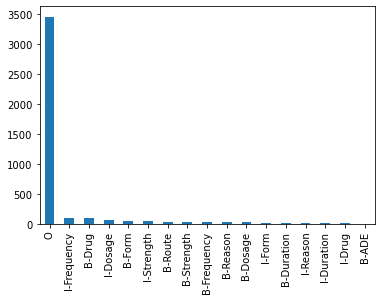

In [7]:
ann_tokens_df["entity"].value_counts().plot.bar()

In [8]:
ann_tokens = df_to_namedtuples(name="Annotation", df=ann_tokens_df)
ann_tokens[:4]

[Annotation(doc_id='100035', token='Admission', start_idx=0, end_idx=9, entity='O'),
 Annotation(doc_id='100035', token='Date', start_idx=10, end_idx=14, entity='O'),
 Annotation(doc_id='100035', token=':', start_idx=14, end_idx=15, entity='O'),
 Annotation(doc_id='100035', token='[', start_idx=17, end_idx=18, entity='O')]

In [9]:
seqs = generate_annotated_token_seqs(ann_tokens, seq_length=254)
[(i, len(seq)) for i, seq in enumerate(seqs)]

[(0, 254),
 (1, 254),
 (2, 254),
 (3, 254),
 (4, 254),
 (5, 254),
 (6, 254),
 (7, 254),
 (8, 254),
 (9, 254),
 (10, 254),
 (11, 254),
 (12, 254),
 (13, 254),
 (14, 254),
 (15, 174)]

In [10]:
from ner_ehr.data.variables import AnnotationTuple

In [11]:
seqs[11][-5:]

[Annotation(doc_id='100035', token='1', start_idx=15229, end_idx=15230, entity='I-Dosage'),
 Annotation(doc_id='100035', token=')', start_idx=15230, end_idx=15231, entity='I-Dosage'),
 Annotation(doc_id='100035', token='Capsule', start_idx=15232, end_idx=15239, entity='B-Form'),
 Annotation(doc_id='100035', token='PO', start_idx=15240, end_idx=15242, entity='B-Route'),
 Annotation(doc_id='100035', token='BID', start_idx=15243, end_idx=15246, entity='O')]

In [12]:
seqs[12][:10]

[Annotation(doc_id='100035', token='(', start_idx=15247, end_idx=15248, entity='O'),
 Annotation(doc_id='100035', token='2', start_idx=15248, end_idx=15249, entity='O'),
 Annotation(doc_id='100035', token='times', start_idx=15250, end_idx=15255, entity='O'),
 Annotation(doc_id='100035', token='a', start_idx=15256, end_idx=15257, entity='O'),
 Annotation(doc_id='100035', token='day', start_idx=15258, end_idx=15261, entity='O'),
 Annotation(doc_id='100035', token=')', start_idx=15261, end_idx=15262, entity='O'),
 Annotation(doc_id='100035', token='.', start_idx=15262, end_idx=15263, entity='O'),
 Annotation(doc_id='100035', token='6', start_idx=15264, end_idx=15265, entity='O'),
 Annotation(doc_id='100035', token='.', start_idx=15265, end_idx=15266, entity='O'),
 Annotation(doc_id='100035', token='furosemide', start_idx=15267, end_idx=15277, entity='B-Drug')]

In [1]:
from ner_ehr.training.datasets import EHRDataset, EHRDataModule
from ner_ehr.data.ehr import annotations_col_converters

In [6]:
dm = EHRDataModule(train_dir="../processed/train", annotated=True, batch_sizes=32)

In [7]:
dm.setup()

In [8]:
train_loader = dm.train_dataloader()

In [11]:
dm.train_dataset

In [21]:
dataset.tokens

[Token(doc_id='186134', token='Admission', start_idx=0, end_idx=9, entity='O'),
 Token(doc_id='186134', token='Date', start_idx=10, end_idx=14, entity='O'),
 Token(doc_id='186134', token=':', start_idx=14, end_idx=15, entity='O'),
 Token(doc_id='186134', token='[', start_idx=17, end_idx=18, entity='O'),
 Token(doc_id='186134', token='*', start_idx=18, end_idx=19, entity='O'),
 Token(doc_id='186134', token='*', start_idx=19, end_idx=20, entity='O'),
 Token(doc_id='186134', token='2185-9-12', start_idx=20, end_idx=29, entity='O'),
 Token(doc_id='186134', token='*', start_idx=29, end_idx=30, entity='O'),
 Token(doc_id='186134', token='*', start_idx=30, end_idx=31, entity='O'),
 Token(doc_id='186134', token=']', start_idx=31, end_idx=32, entity='O'),
 Token(doc_id='186134', token='Discharge', start_idx=46, end_idx=55, entity='O'),
 Token(doc_id='186134', token='Date', start_idx=56, end_idx=60, entity='O'),
 Token(doc_id='186134', token=':', start_idx=60, end_idx=61, entity='O'),
 Token(doc

In [12]:
dataset = EHRDataset(dir="../processed/train", annotated=False)

In [14]:
from torch.utils.data import DataLoader

In [19]:
dl = DataLoader(dataset, batch_size=32)

In [20]:
for i in dl:
    print(i)
    break

Token(doc_id=('186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134', '186134'), token=('Admission', 'Date', ':', '[', '*', '*', '2185-9-12', '*', '*', ']', 'Discharge', 'Date', ':', '[', '*', '*', '2185-9-17', '*', '*', ']', 'Date', 'of', 'Birth', ':', '[', '*', '*', '2141-7-28', '*', '*', ']', 'Sex'), start_idx=tensor([  0,  10,  14,  17,  18,  19,  20,  29,  30,  31,  46,  56,  60,  64,
         65,  66,  67,  76,  77,  78,  81,  86,  89,  94,  97,  98,  99, 100,
        109, 110, 111, 125]), end_idx=tensor([  9,  14,  15,  18,  19,  20,  29,  30,  31,  32,  55,  60,  61,  65,
         66,  67,  76,  77,  78,  79,  85,  88,  94,  95,  98,  99, 100, 109,
        110, 111, 112, 128]), entity=('O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

In [35]:
dataset.__len__()//128//32

180

In [ ]:
73907

In [ ]:
dataset.__dict__

In [ ]:
# import spacy
# from spacy import displacy

# for i, (start, end) in enumerate(para_start_indexes3):
#     print(f"{'='*50}{i}{'='*50}")
#     window = 10
#     idx = (end - start + 2*window)//2
    
#     string = text[start-window:end+window]
    
#     ex = [{"text": string, 
#        "ents": [{"start": idx-1, "end": idx+1, "label": "O"}],
#        "title": None}]
#     html = displacy.render(ex, style="ent", manual=True)